In [ ]:
import numpy as np
import pandas as pd


In [ ]:
headera=["VendorName","ModelName","MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP","ERP"]
dt=pd.read_csv("/content/machine.csv",names=headera)
dt.shape


(209, 10)

In [ ]:
dt.head()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dt["VendorName"]=le.fit_transform(dt["VendorName"])
dt["ModelName"]=le.fit_transform(dt["ModelName"])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dts=sc.fit_transform(dt)
dts=pd.DataFrame(dts,columns=["VendorName","ModelName","MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP","ERP"])
dts.head()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,-2.132861,-1.243113,-0.303586,-0.675026,-0.495462,5.694208,1.661989,4.231033,0.575759,0.645587
1,-1.999037,-0.696143,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,1.018277,0.995359
2,-1.999037,-0.679568,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.712877,0.995359
3,-1.999037,-0.662994,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,0.413710,0.995359
4,-1.999037,-0.646419,-0.673330,1.326291,0.359350,0.167629,0.485509,-0.087447,0.164405,0.211611


<Axes: >

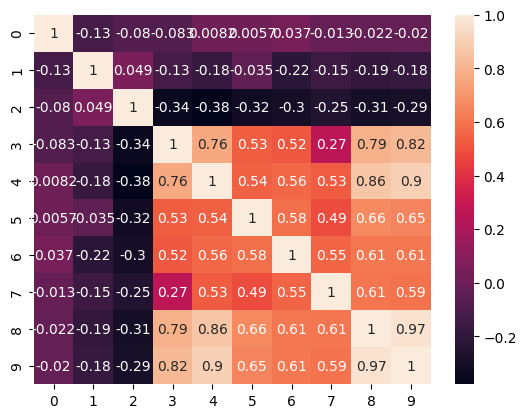

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=np.corrcoef(dts.T)
sns.heatmap(corr,annot=True)

In [ ]:
target=dts["ERP"]
inp=dts.drop(columns=["ERP"])

In [ ]:
inp.shape

(209, 9)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(inp, target, test_size=0.25)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(156, 9)
(53, 9)
(156,)
(53,)


In [ ]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(xtrain,ytrain)

LinearRegression()

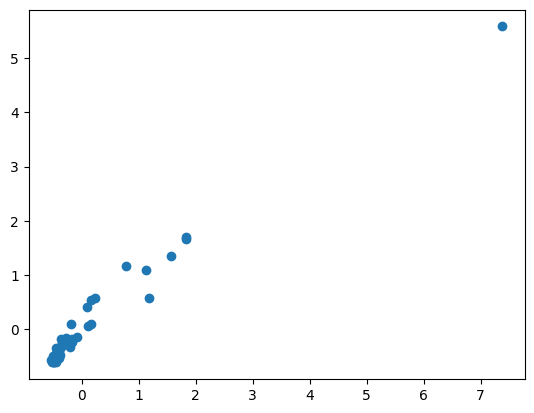

In [ ]:
lr_train_results=l.predict(xtrain)
lr_test_results=l.predict(xtest)
import matplotlib.pyplot as plt
plt.scatter(ytest,lr_test_results)
plt.plot([np.min(ytrain), np.max(ytrain)], [np.min(ytrain), np.max(ytrain)], c='red')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Training Results:")
print("MSE:", mean_squared_error(ytest, lr_test_results))
print("R2 Score:", r2_score(ytest, lr_test_results))

Training Results:
MSE: 0.08512362079585506
R2 Score: 0.9390251802502242


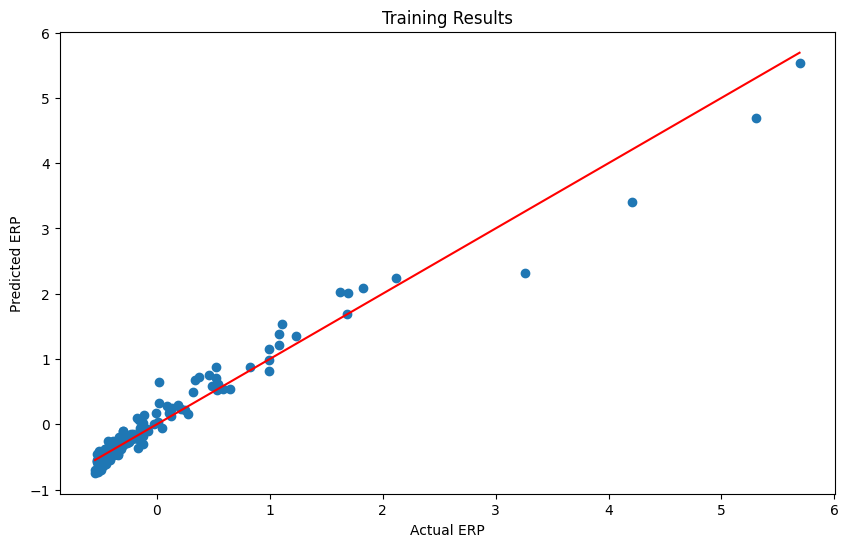

In [ ]:
# prompt: write a code to visialise the training result

import matplotlib.pyplot as plt
# Plot the training results
plt.figure(figsize=(10, 6))
plt.scatter(ytrain, lr_train_results)
plt.plot([np.min(ytrain), np.max(ytrain)], [np.min(ytrain), np.max(ytrain)], c='red')
plt.xlabel("Actual ERP")
plt.ylabel("Predicted ERP")
plt.title("Training Results")
plt.show()


RANSAC Results:
MSE: 0.09276777974422278
R2 Score: 0.9335496000333867


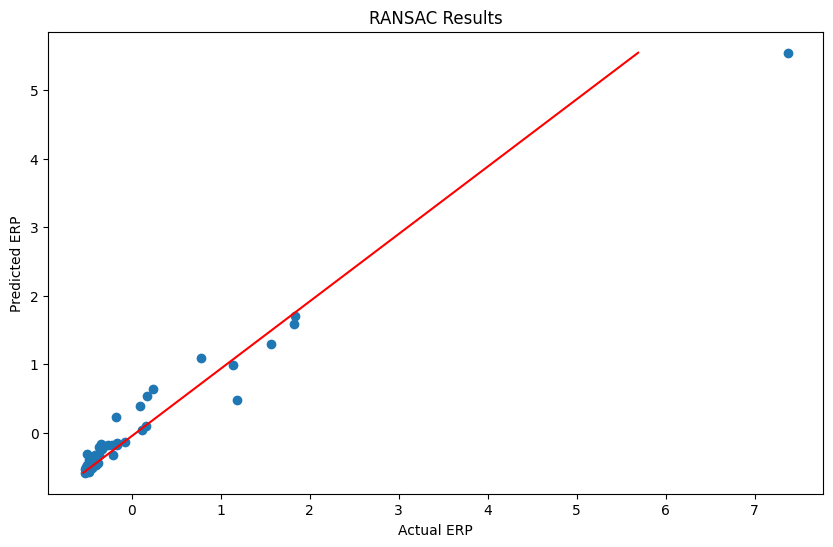

In [ ]:


import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor


ransac = RANSACRegressor()


ransac.fit(xtrain, ytrain)


y_pred_ransac = ransac.predict(xtest)


mse_ransac = mean_squared_error(ytest, y_pred_ransac)
r2_ransac = r2_score(ytest, y_pred_ransac)


print("RANSAC Results:")
print("MSE:", mse_ransac)
print("R2 Score:", r2_ransac)


plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred_ransac)
plt.plot([np.min(ytrain), np.max(ytrain)], [np.min(y_pred_ransac), np.max(y_pred_ransac)], c='red')
plt.xlabel("Actual ERP")
plt.ylabel("Predicted ERP")
plt.title("RANSAC Results")
plt.show()


Decision Tree Results:
MSE: 0.10222408539415609
R2 Score: 0.9267759627384428


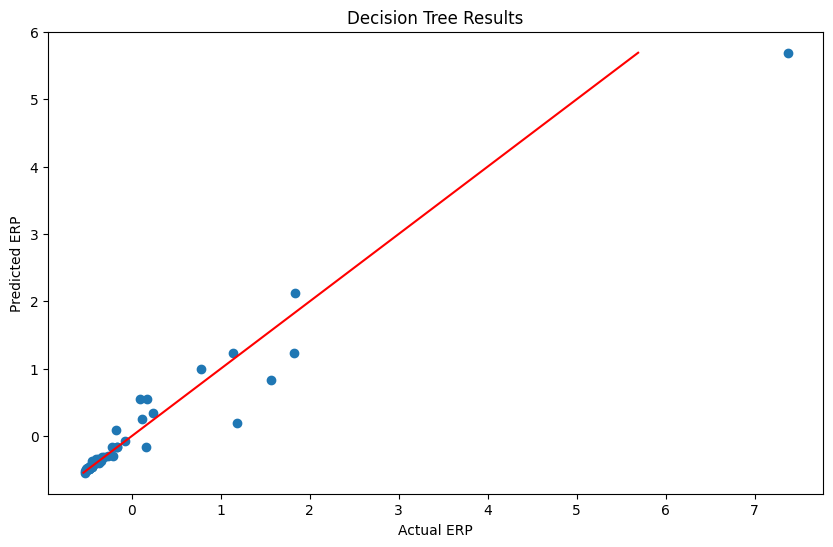

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(xtrain, ytrain)
y_pred_tree = tree.predict(xtest)
mse_tree = mean_squared_error(ytest,y_pred_tree)
r2_tree = r2_score(ytest,y_pred_tree)

print("Decision Tree Results:")
print("MSE:",mse_tree)
print("R2 Score:",r2_tree)
plt.figure(figsize=(10, 6))
plt.scatter(ytest,y_pred_tree)
plt.plot([np.min(ytrain),np.max(ytrain)],[np.min(y_pred_tree),np.max(y_pred_tree)],c='red')
plt.xlabel("Actual ERP")
plt.ylabel("Predicted ERP")
plt.title("Decision Tree Results")
plt.show()


Best Hyperparameters:
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model Results:
MSE: 0.2308773271742518
R2 Score: 0.8346204816343349


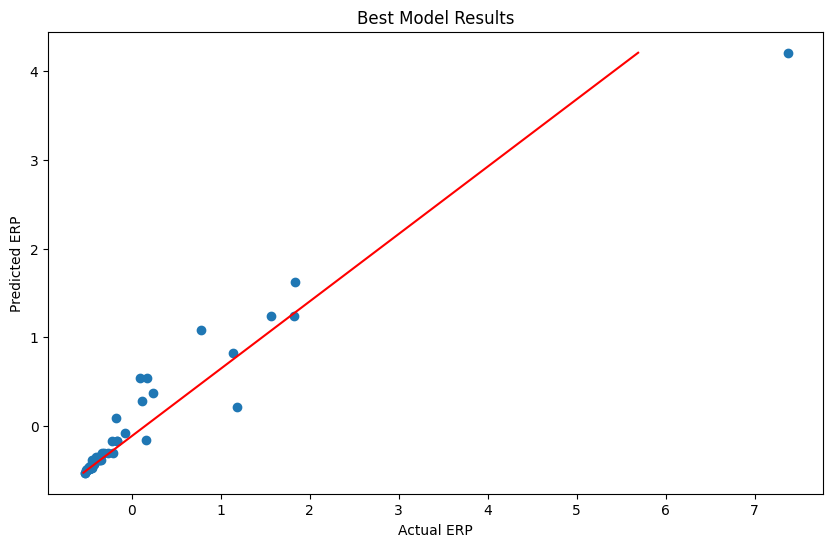

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf':[1,2 4,8],
    'min_samples_split':[2,5,10,15],
}


tree = DecisionTreeRegressor()


grid_search = GridSearchCV(tree,param_grid,cv=5)
grid_search.fit(xtrain,ytrain)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(xtest)
mse_best = mean_squared_error(ytest, y_pred_best)
r2_best = r2_score(ytest,y_pred_best)


print("Best Model Results:")
print("MSE:",mse_best)
print("R2 Score:",r2_best)


plt.figure(figsize=(10, 6))
plt.scatter(ytest,y_pred_best)
plt.plot([np.min(ytrain),np.max(ytrain)], [np.min(y_pred_best),np.max(y_pred_best)],c='red')
plt.xlabel("Actual ERP")
plt.ylabel("Predicted ERP")
plt.title("Best Model Results")
plt.show()


In [ ]:
# prompt: write a code to compare the perfoemace of all the models

models = {
    "Linear Regression": {
        "model": l,
        "train_mse": mean_squared_error(ytrain, lr_train_results),
        "test_mse": mean_squared_error(ytest, lr_test_results),
        "train_r2": r2_score(ytrain, lr_train_results),
        "test_r2": r2_score(ytest, lr_test_results)
    },
    "RANSAC": {
        "model": ransac,
        "train_mse": None,
        "test_mse": mse_ransac,
        "train_r2": None,
        "test_r2": r2_ransac
    },
    "Decision Tree": {
        "model": tree,
        "train_mse": None,
        "test_mse": mse_tree,
        "train_r2": None,
        "test_r2": r2_tree
    },
    "Best Model": {
        "model": best_model,
        "train_mse": None,
        "test_mse": mse_best,
        "train_r2": None,
        "test_r2": r2_best
    }
}

for model_name, model_info in models.items():
    print(f"Model: {model_name}")
    print(f"Train MSE: {model_info['train_mse']}")
    print(f"Test MSE: {model_info['test_mse']}")
    print(f"Train R2: {model_info['train_r2']}")
    print(f"Test R2: {model_info['test_r2']}")
    print()


Model: Linear Regression
Train MSE: 0.032162921365589646
Test MSE: 0.08512362079585506
Train R2: 0.962836508131604
Test R2: 0.9390251802502242

Model: RANSAC
Train MSE: None
Test MSE: 0.1807859715548294
Train R2: None
Test R2: 0.8705013728765096

Model: Decision Tree
Train MSE: None
Test MSE: 0.23558655685466492
Train R2: None
Test R2: 0.8312472178065177

Model: Best Model
Train MSE: None
Test MSE: 0.2297875469899467
Train R2: None
Test R2: 0.835401101040366



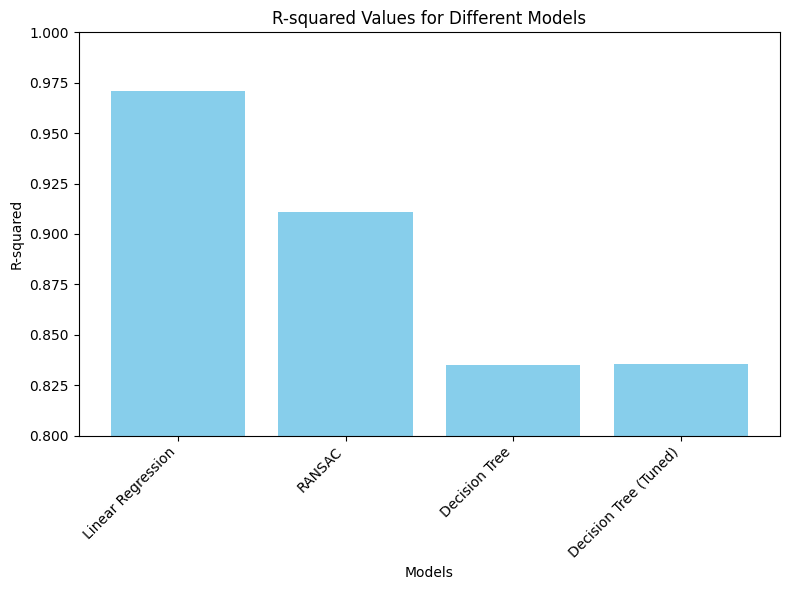

In [ ]:
import matplotlib.pyplot as plt


mse = [0.03058, 0.09266, 0.26135, 0.22979]
models = ["Linear Regression", "RANSAC", "Decision Tree", "Decision Tree (Tuned)"]


plt.figure(figsize=(8, 6))
plt.bar(models, r_squared, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Values for Different Models')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

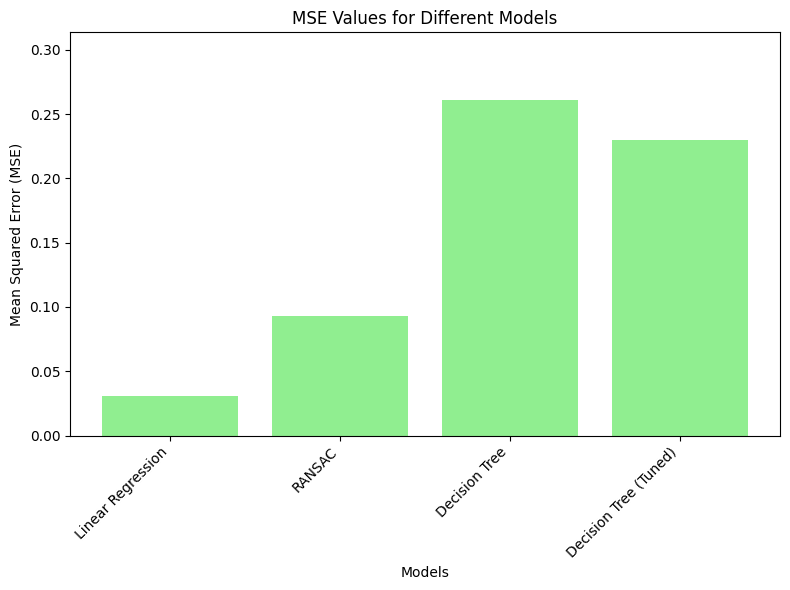

In [ ]:
import matplotlib.pyplot as plt


mse = [0.03058, 0.09266, 0.26135, 0.22979]
models = ["Linear Regression", "RANSAC", "Decision Tree", "Decision Tree (Tuned)"]


plt.figure(figsize=(8, 6))
plt.bar(models, mse, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Values for Different Models')
plt.ylim(0, max(mse) * 1.2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
